In [16]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Dynamique de population et Génétique

*Sujet d'ARE Dynamic 2019*

# 1. Modèle de Galton-Watson 

[Francis Galton](https://fr.wikipedia.org/wiki/Francis_Galton) (1822-1911) est un scientifique anglais touche-à-tout, ayant des contributions de l'anthropologie à la psychologie en passant par les statistiques. Il consacre une part importante de ses recherches à défendre la théorie de l'évolution de son cousin, Charles Darwin. Il est considéré comme l'un des fondateurs de la biométrie, il découvre l'identification par empreintes digitales, cependant il est aussi l'un des fondateurs de l'[eugénisme](https://fr.wikipedia.org/wiki/Eug%C3%A9nisme) et soutient des politiques publiques peu glorieuses. 

Au cours du XIXème siècle il s'intéresse à la disparition des patronymes. Pour ce faire, il introduit le [modèle de Galton-Watson](https://fr.wikipedia.org/wiki/Processus_de_Galton-Watson) permettant de modéliser la dynamique d'une population. Introduit une première fois en 1845 par [Irénée-Jules Bienaymé](https://fr.wikipedia.org/wiki/Ir%C3%A9n%C3%A9e-Jules_Bienaym%C3%A9).

### Comment modéliser un tel phénomène ?

Considérons un ensemble d'**individus** formant une **population**. Par soucis de simplicité nous faisons abstraction des modalités de reproduction, couple, genre, etc...  
Chaque individu de la population est modélisé par une **variable** $X$ représentant sa capacité de reproduction, c'est-à-dire son nombre de descendants.  
Chaque individu de la population peut avoir $k$ descendants avec probabilité $p_k$ : $\mathbb{P}(X = k) = p_k$ avec $\sum_k p_k =1$.  

Commençons par modéliser un individu : la variable $X$.

In [46]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité
p = {0 : 0.5,
     1 : 0.2,
     2 : 0.2,
     3 : 0.1}

# Let's assert that this is a probalitiy distribution:
np.testing.assert_almost_equal(sum(p.values()),1)

In [47]:
def number_of_descendants(p):
    '''
    dict[int:float]->int
    Étant donnée une distibution de probabilité 'p', la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    for k in p:
        s += p[k]
        if u < s:
            return k
number_of_descendants(p)

0

**Question 1.1 :** Remplacer la distribution $p$ par une distribution qui vous semble cohérente, puis tester cette fonction. (Par exemple, vous pourrez tirer un certain nombre de fois un nombre de descendants selon cette fonction, puis vérifier que la distribution observée est conforme.)

In [19]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité
p = {0 : 0.1,
     1 : 0.3,
     2 : 0.5,
     8: 0.1}

# Let's assert that this is a probalitiy distribution:
np.testing.assert_almost_equal(sum(p.values()),1)

In [20]:
number_of_descendants(p)

1

Modélisons maintenant cette population et son évolution au fil des générations.  
Soit $Z_n$ la population de la n-ème génération. $Z_{n+1} = \sum_{i=1}^{Z_n}X$.

In [48]:

def update_population(Z,p):
    '''
    int*dict[int:float]->int
    Étant donnés un nombre d'individus 'Z' et une distibution de probabilité de descendants 'p',
    la fonction retourne le nombre d'individus à la prochaine génération.
    '''
    Z_new = 0
    for k in range(Z):
        #sum up all the descendants over all the population Z
        Z_new += number_of_descendants(p)
    return Z_new


**Question 1.2 :** Compléter la fonction "population_n_generations" ci-dessous qui, étant donné un nombre d'invidus de départ $Z_0$, une distribution de probabilité de descendants $p$ et un nombre de générations $n$, retourne une liste $L$ telle que $L[i]$ soit le nombre d'individus à la génération $i$ pour $i$ de $0$ à $n-1$.

In [22]:
p = {0 : 0.1,
     1 : 0.3,
     2 : 0.5,
     8 : 0.1}
def population_n_generations(Z0,p,n):
    """
     int*dict[int:float]*int->list[int]
     ...
    """
    L=[Z0]
    w=Z0
    for i in range(n-1):
        L.append(update_population(w,p))
        w=update_population(w,p)
    return L

#test pour 10 générations, population initiale 20 individus
Z0 = 20
n = 10
print(population_n_generations(Z0,p,n))

[20, 44, 69, 108, 265, 711, 1464, 3168, 6621, 14206]


À présent, visualisons l'évolution de cette population. Vous pouvez changer $n$, $Z_0$ et $p$.

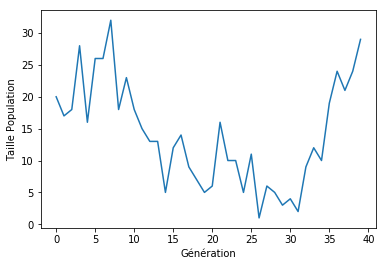

In [179]:
n = 40

Z0 = 20
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3: 0.1}
np.testing.assert_almost_equal(sum(p.values()),1)

def plot_population(L):
   
    plt.figure()
    plt.plot(L)
    plt.ylabel("Taille Population")
    plt.xlabel("Génération")
    plt.show()
    return
    
L=population_n_generations(Z0,p,n)
plot_population(L)

**Question 1.3** : Pour la capacité de reproduction $p$ donnée en exemple, observez-vous toujours une extinction de la population ?  Si c'est le cas, déterminez combien de générations sont nécessaires *en moyenne* avant que la population ne s'éteigne ?


**reponse:**on observe une extinction après 200 ème génération

On appelle espérance d'une variable discrète $X$ : $\mathbb{E}[X] = \sum_k p_kk$

**Question 1.4**: Compléter la fonction "esperance" ci-dessous permettant de calculer l'espérance d'une variable discrète $X$.

In [23]:
p = {0 : 0.4,
     1 : 0.3,
     3 : 0.2,
     4: 0.1}
def esperance(p):
    """
    dict[int:float]->float
    ...
    """
    e=0
    for k in p:
        e+= k*p[k]
    return e
esperance(p)

1.3000000000000003

**Question 1.5**: Prenez à présent une capacité de reproduction dont l'espérance est 1.5 (testez que c'est bien le cas à l'aide de votre fonction précédente), et reproduisez l'expérience de la question 1.3. 

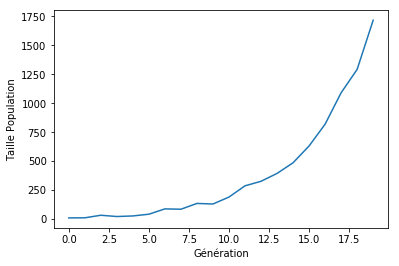

In [204]:
L=population_n_generations(10,p,20)
plot_population(L)

**réponse :  **
La population augmente

**Question 1.6** : Jouer sur le paramètre $e = \mathbb{E}[X]$ et déterminer une valeure qui semble jouer un rôle critique dans le fait que la population va s'éteindre ou pas.

**L'espérance doit être supérieur à 1**


**Question 1.7** : Que se passe-t-il lorsque $Z_0$ et $n$ sont grands ?

In [ ]:
on obtient un modèle proche de notre systeme

# 2. Island Model

Dans cette seconde partie, le but est d'analyser la répartition et la dissémination des allèles au sein d'une population, répartie dans différentes zones géographiques, tout en prenant en compte les migrations.  

**Rappel :** Un allèle est une version variable d'un même gène. En général, il existe deux allèles pour chaque gène. Par exemple : si nous possèdons l'allèle brun nous avons les cheveux bruns, si nous ne l'avons pas nous avons les cheveux blonds. (extrême simplification, ne pas répéter à un biologiste).

Imaginons trois iles distinctes $A$, $B$ et $C$, sur chaque île réside une population distincte. Dans chaque population nous constatons une proportion différente de personne possédant un certain allèle. La distribution de cet allèle est notée par : $p_i$ pour $i\in \{A,B,C\}$.


![Island Model](Island_Model.png "Island_Model")



Par exemple : $p_A$ représente le pourcentage de la population de l'ile $A$ ayant les cheveux bruns.  

**Hypothèse 1:** La population globale $Z$ est considérée comme fixe et équirépartie entre les trois îles, chaque île comporte donc $Z/3$ individus. 
La population étant considérée comme stable, chaque individu laisse place à un seul individu à la génération suivante. Dans un premier temps nous ignorons donc le renouvelement de la population.  

Nous observons une migration d'une **fraction** $m$ d'une île à une autre au fil des générations, celle-ci est cependant équilibrée, à double sens, le nombre d'invidus par île ne varie donc pas. Par exmple, pour $m=0.1$, à chaque génération $10\%$ de la population va migrer de chaque île vers les autres. Cette fraction ne peut donc pas excéder $0.5$ (dans ce cas la totalité de la population migre de chaque île). 

Dans cette partie, nous chercherons à répondre à la question suivante : Comment les migrations impactent la distribution d'un allèle au sein des 3 îles ?


***Modélisons l'évolution de la proportion de la population possédant notre allèle (les cheveux bruns) au sein de chaque île. Notons par $p_{A,n}$ la distribution de notre allèle dans l'ile $A$ à la génération $n$. *** 

On a $p_{A,n+1} = \frac{p_{A,n}\frac{Z}{3}(1 - 2m) + p_{B,n}\frac{Z}{3}m + p_{C,n}\frac{Z}{3}m}{\frac{Z}{3}}$  

et donc $p_{A,n+1} = p_{A,n}(1 - 2m) + p_{B,n}m + p_{C,n}m$.

**Question 2.1 :** Expliquer cette formule. Quant est-il pour $p_{B,n+1}$ et $p_{C,n+1}$ ?

PAn+1 est proportion de gens au cheveux brun à la n+1 ème géneration sur l'île A
idem pour les autres îles.

In [24]:
import numpy

# Nous utiliserons les paramètres suivants.

m = 0.1 # coefficient de migration

p = {'A' : 0.5,
    'B' : 0.2,
    'C' : 0.8} # Initial probability to have brown hair

**Question 2.2 :** Corriger la fonction *update_genetics* ci-dessous qui prend en entrée un dictionaire $p$ (représentant la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à un instant donné), une fraction de migration $m$ et retourne la proportion d'individus ayant les cheveux bruns dans chacune des trois îles à l'instant suivant sous la forme d'un dictionaire.

In [25]:
def update_genetics(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    p_new['A'] = p['A']*(1-2*m)+p['B']*m+p['C']*m
    p_new['B'] = p['B']*(1-2*m)+p['A']*m+p['C']*m
    p_new['C'] = p['C']*(1-2*m)+p['B']*m+p['A']*m
    return p_new
update_genetics(p,m)


{'A': 0.5, 'B': 0.29000000000000004, 'C': 0.7100000000000002}

**Question 2.3 :** Compléter la signature et la description de la fonction *genetics_n_migrations* suivante.

In [27]:
def genetics_n_migrations(p,m,n):
    '''
       dict[str:float]*float*int->list[float]
        retourne les proportion d'un allèle de chaque ile à la n ème generation.
    '''
    keys=["A","B","C"] 
    M = []
    M.append([p[k] for k in keys])
    for i in range(1,n):
        p = update_genetics(p,m)
        M.append([p[k] for k in keys])
    return M

A présent visualisons la fréquence de l'allèle au cours du temps.

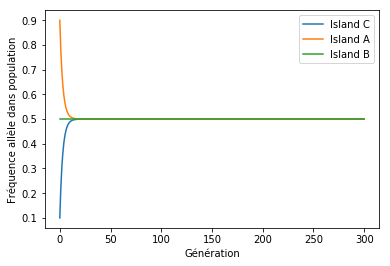

In [28]:
p = {'A' : 0.1,
    'B' : 0.9,
    'C' : 0.5}

m = 0.1 # Ratio of the population that migrate every generation

n = 301

M = genetics_n_migrations(p,m,n)

def plot_genetics(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics(M,p)

**Questions 2.4:** Modifier $p_A,p_B,p_C$ ainsi que le taux de migration $m$ et décrire les différents phénomènes observés.

Pa Pb Pc influe sur les fréquences initiale de l'allèle et l'évolution est un équilibre de la fréquence de l'allèle dans toute la population

On peut complexifier la modélisation en faisant varier le nombre d'îles ou bien les taux de migrations entre îles : $m$ $\rightarrow$ $m_{A,B}, m_{B,C}, m_{C,A}$.

### Variante  1 : Nombre d'îles variable :

**Question 2.5 (facultatif) :** Adapter les fonctions précédentes pour un nombre d'îles arbitraire. 

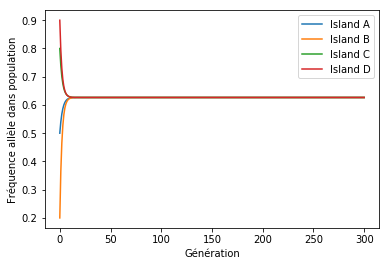

In [40]:
p = {'A' : 0.5,
    'B' : 0.2,
    'C' : 0.8,
    'D': .9}
def update_genetics(p,m):
    '''
    dict[str:float]*float->dict[str:float]
    Update the population's genetics 
    '''
    p_new={}
    
    n=len(p)
    for i in p:
          p[i]= sum(p.values())*m + p[i]*(1-n*m)
    return p

def genetics_n_migrations(p,m,n):
    '''
       dict[str:float]*float*int->list[float]
        retourne les proportion d'un allèle de chaque ile à la n ème generation.
    '''
    M = []
    M.append([p[k] for k in p])
    for i in range(1,n):
        p = update_genetics(p,m)
        M.append([p[k] for k in p])
    return M

m = 0.1 # Ratio of the population that migrate every generation

n = 301

M = genetics_n_migrations(p,m,n)

def plot_genetics(M,p):
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans population")
    plt.show()
    return
plot_genetics(M,p)

### Variante 2 : Taux de migrations différents entre îles  :

Considérons tout d'abord : $m_{A,B} = m_{B,A}$, $m_{A,C} = m_{C,A}$ et $m_{C,B} = m_{B,C}$.

**Question 2.6 :** Retrouver la formule suivante et adapter les fonctions précédentes. $p_{A,n+1} = p_{A,n}(1-m_{A,B}-m_{C,A})+p_{B,n}m_{B,A}+p_{C,n}m_{C,A}$

In [46]:
#Nous utiliserons les paramètres suivants.

p = {'A' : 0.5,
    'B' : 0.4,
    'C' : 0.8} # Initial probability to have red hair 

m = {('A','B') : 0.2, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.2,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}

def update_genetics2(p,m):
    p_new={}
    
    p['A']= p['A']*(1-m[('A','B')]-m[('A','C')]) + p['B']*m[('B','A')] + p['C']*m[('C','A')]
    p['B']= p['B']*(1-m[('B','A')]-m[('B','C')]) + p['A']*m[('A','B')] + p['C']*m[('C','B')]
    p['C']= p['C']*(1-m[('C','B')]-m[('C','A')]) + p['B']*m[('B','C')] + p['A']*m[('A','C')]
    return p

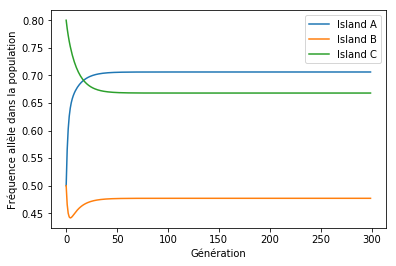

In [64]:

def generation_variante2():
    '''
       dict[str:float]*float*int->list[float]
        retourne les proportion d'un allèle de chaque ile à la n ème generation.
    '''
    n=300
    p = {'A' : 0.5,'B' : 0.5,'C' : 0.8} # Initial probability to have red hair 

    m = {('A','B') : 0.2, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.3,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}
    M = []
    M.append([p[k] for k in p])
    for i in range(1,n):
        p = update_genetics2(p,m)
        M.append([p[k] for k in p])
    return M

M = generation_variante2()
def plot_genetics(M,p):
    
    plt.figure()
    plt.plot(M)
    plt.legend(["Island "+i for i in p])
    plt.xlabel("Génération")
    plt.ylabel("Fréquence allèle dans la population")
    plt.show()
    return
plot_genetics(M,p)

**Question 2.7**: Que se passe-t-il si le taux de migrations d'un île à une autre n'est plus symétrique : $m_{A,B} \neq m_{B,A}$ ? Est-ce que notre notre calcul est toujours correct ? (Indice : cf hypothèse 1.)


Il se  semble qu'un écart se creuse entre les fréquences de l'allèle dans les îles A et B, lorsque m(A,B) est différent de m(B,A)
Notre calcul n'est plus correct car onne respcte plus l'hypothèse 1

# 3. Galton-Watson et Migrations

Dans cette partie nous nous intéressons aux nombres d'individus sur chaque île sans tenir compte de leurs patrimoines génétiques. Nous supposons que la population de chaque île suit un modele de Gatson-Watson. Prenons en compte les migrations et adaptons notre modèle en conséquent.

Notons $Z_{A,n},Z_{B,n},Z_{C,n}$ les populations des îles $A$, $B$ et $C$ à la génération $n$. 

La formule suivante peut sembler compliquée, mais s'interprète assez facilement :
 $Z_{A,n}' = Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,A}$.
- $Z_{A,n+1} = \sum_{i=1}^{Z_{A,n}'}X$ 

$Z_{A,n}'$ est la population de l'île $A$ à la generation $n$ **après** avoir pris en compte les migrations.

**Question 3.1 :** Retrouver les formules pour $Z_{B,n+1}$ ainsi que pour $Z_{C,n+1}$.

$Z_{B,n}' = Z_{B,n}(1-m_{B,C}-m_{B,A})+Z_{A,n}m_{A,B}+Z_{C,n}m_{C,B}$

$Z_{C,n}' = Z_{C,n}(1-m_{C,A}-m_{C,B})+Z_{B,n}m_{B,C}+Z_{A,n}m_{A,C}$

Modélisons l'évolution de cet archipel au fil des générations.

In [15]:
#Nous utiliserons les paramètres suivants.

p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants

np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 40,
     'B' : 1000,
     'C' : 400} #Initial Population

M = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}

n = 10 #Number of generations

**Question 3.2 :** Compléter la fonction ci-dessous.

$Z_{A,n}' = Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,A}$

$Z_{B,n}' = Z_{B,n}(1-m_{B,C}-m_{B,A})+Z_{A,n}m_{A,B}+Z_{C,n}m_{C,B}$

$Z_{C,n}' = Z_{C,n}(1-m_{C,A}-m_{C,B})+Z_{B,n}m_{B,C}+Z_{A,n}m_{A,C}$

In [14]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants

np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 1,
     'B' : 100,
     'C' : 100} #Initial Population

m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}

 #Number of generations

def update_populations_with_migrations(Z,P,m):
    '''
    dict[str:int]*dict[str:dict[int:float]]*dict[tuple [str*str]:float]-> dict[str:int]
    retourne la mise à jour de la population avec la migration en fonction du taux de migration M,
     la population initiale Z et le parametre GW de chaque îles P
    '''
    Z_new = Z
    Z_new['A']= Z_new['A']*(1-m[('A','B')]-m[('A','C')]) + Z_new['B']*m[('B','A')] + Z_new['C']*m[('C','A')]
    Z_new['B']= Z_new['B']*(1-m[('B','A')]-m[('B','C')]) + Z_new['A']*m[('A','B')] + Z_new['C']*m[('C','B')]
    Z_new['C']= Z_new['C']*(1-m[('C','B')]-m[('C','A')]) + Z_new['B']*m[('B','C')] + Z_new['A']*m[('A','C')]
    for i in Z:
        Z_new[i]=update_population(int(Z_new[i]),p)
       
    return Z_new


def population_n_generations_1(Z,P,M):
    n = 10
    
    La=[Z0['A']]
    Lb=[Z0['B']]
    Lc=[Z0['C']]
    for i in range(n-1):
        W=update_populations_with_migrations(Z0,P,m)
        La.append(W['A'])
        Lb.append(W['B'])
        Lc.append(W['C'])

    return (La,Lb,Lc)

print(population_n_generations_1(Z0,P,m))






"""
def plot_population(M):
    L=population_n_generations_1(Z0,P,m)
    plt.figure()
    plt.plot(L['A'])
    plt.ylabel("Taille Population")
    plt.xlabel("Génération")
    plt.show()
    return
plot_population(M)
"""

NameError: name 'number_of_descendants' is not defined

**Question 3.3 :** Visualiser le nombre d'individu sur chaque île.

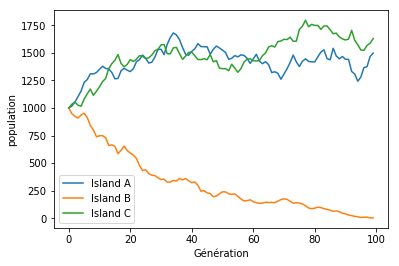

In [256]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants

np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 1000,
     'B' : 1000,
     'C' : 1000} #Initial Population

m = {('A','B') : 0.0, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.0}


M = population_n_generations_1(Z0,P,m)
S = ['A','B','C']
def plot_genetics(M,S):
    
    plt.figure()
    plt.plot(M[0])
    plt.plot(M[1])
    plt.plot(M[2])
    plt.legend(["Island "+i for i in S])
    plt.xlabel("Génération")
    plt.ylabel("population")
    plt.show()
    return
plot_genetics(M,S)



**Questions 3.4 :**
- Faire varier les populations initiales $Z_0$.
- Modifier les paramètres de migrations pour éteindre la population d'une seule île.
- Faire survivre la population d'une seule île.

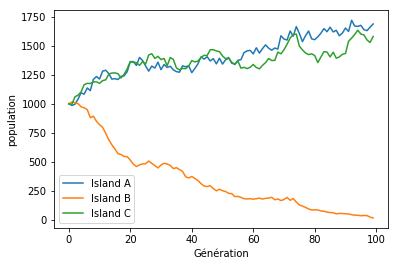

In [257]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants

np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 1000,
     'B' : 1000,
     'C' : 1000} #Initial Population

m = {('A','B') : 0.0, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.0}


M = population_n_generations_1(Z0,P,m)
S = ['A','B','C']
def plot_genetics(M,S):
    
    plt.figure()
    plt.plot(M[0])
    plt.plot(M[1])
    plt.plot(M[2])
    plt.legend(["Island "+i for i in S])
    plt.xlabel("Génération")
    plt.ylabel("population")
    plt.show()
    return
plot_genetics(M,S)



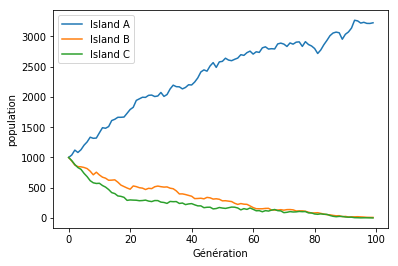

In [259]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1} # Number of descendants

np.testing.assert_almost_equal(sum(p.values()),1)

P = {'A' : p,
     'B' : p,
     'C' : p} # Galton Watson parameter on each island

Z0 = {'A' : 1000,
     'B' : 1000,
     'C' : 1000} #Initial Population

m = {('A','B') : 0.0, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.0,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.0}


M = population_n_generations_1(Z0,P,m)
S = ['A','B','C']
def plot_genetics(M,S):
    
    plt.figure()
    plt.plot(M[0])
    plt.plot(M[1])
    plt.plot(M[2])
    plt.legend(["Island "+i for i in S])
    plt.xlabel("Génération")
    plt.ylabel("population")
    plt.show()
    return
plot_genetics(M,S)



### Visualisation Dynamique (Facultatif)

Avec cette visualisation il est très simple d'observer les phénomènes de cas (sur/sous)-critiques, en faisant varier ne serait-ce que très légérement l'espérance.

In [11]:
import pandas as pd
def animated_populations(Z,P,M,n):
    n_island = len(Z)
    pop_dict = {0:Z}
    for i in range(n):
        Z = update_populations_with_migrations(Z,P,M)
        pop_dict[i]=Z.copy()
    pop_df = pd.DataFrame.from_dict(pop_dict,orient='index')
    fig = plt.figure()
    cmap = plt.get_cmap('tab10')
    barplot = plt.bar(range(n_island),pop_df.max(),color=[cmap(i) for i in range(n_island)])
    def animate(i):
        populations = pop_df.iloc[i,:]
        for j,b in enumerate(barplot):
            b.set_height(populations[j])
    plt.tick_params(top=False,right=False)
    plt.xticks(range(n_island),["Island "+str(i) for i in Z.keys()])
    plt.ylabel("Population")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    anim = animation.FuncAnimation(fig,animate,blit=False,
                                  frames = n,interval=300,repeat=False)
    #anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    return anim


In [13]:
p = {0 : 0.4,
     1 : 0.3,
     2 : 0.2,
     3 : 0.1}
np.testing.assert_almost_equal(sum(p.values()),1)
P = {'A' : p,
     'B' : p,
     'C' : p}
Z0 = {'A' : 400,
     'B' : 2000,
     'C' : 400}
M = {('A','B') : 0.05, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.05,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}
n = 400
animated_populations(Z0,P,M,n)

NameError: name 'update_populations_with_migrations' is not defined

# 4. Galton-Island

Retournons à notre Island Model, maintenant que nous avons pris en compte l'évolution de la population sur chaque île, celle-ci n'étant plus constante, nous allons pouvoir réaliser un modèle un peu plus réaliste, nous oublions l'**hypothèse 1**.

**Question 4.1 :** Retrouver la formule générale suivante :

$p_{A,n+1} = \frac{\displaystyle p_{A,n}Z_{A,n}(1-m_{A,B}-m_{A,C})+p_{B,n}Z_{B,n}m_{B,A}+p_{C,n}Z_{C,n}m_{C,A}}{\displaystyle Z_{A,n}(1-m_{A,B}-m_{A,C})+Z_{B,n}m_{B,A}+Z_{C,n}m_{C,n}}$


Adapter les fonctions précédentes dans les box ci dessous.

In [74]:
pga = {0 : 0.4,   #Nombre de descendants
     1 : 0.3,
     2 : 0.2,
     3 : 0.1}

pge = {'A' : 0.1,  #probabilité de l'allèle 
    'B' : 0.9,
    'C' : 0.5}
np.testing.assert_almost_equal(sum(pga.values()),1)

P = {'A' : pga,
     'B' : pga,
     'C' : pga}
Z0 = {'A' : 400,
     'B' : 2000,
     'C' : 400}
M = {('A','B') : 0.0, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.05,
     ('A','C') : 0.05,
     ('C','A') : 0.05,
     ('B','C') : 0.01,
     ('C','B') : 0.01}
n = 400

def update_genetics_with_migrations(Z,p_galton,p_genetics,m):
    '''
    Update the genetics of the population 'C', with parameter in 'p_ga' and 'p_gen',
    according to migrations 'm' 
    '''
    P_new = p_genetics

    P_new['A']= ( p_genetics['A'] * Z['A']*(1-m[('A','B')]-m[('A','C')]) + p_genetics['B']*Z['B']*m[('B','A')] + p_genetics['C'] * Z['C'] * m[('C','A')]) / (Z['A']*(1-m[('A','B')]-m[('A','C')]) + Z['B']*m[('B','A')] + Z['C']*m[('C','A')])
    P_new['B']= ( p_genetics['B'] * Z['B']*(1-m[('B','A')]-m[('B','C')]) + p_genetics['A']*Z['A']*m[('A','B')] + p_genetics['C'] * Z['C']*m[('C','B')]) / (Z['B']*(1-m[('B','A')]-m[('B','C')]) + Z['A']*m[('A','B')] + Z['C']*m[('C','B')])
    P_new['C']= ( p_genetics['C'] * Z['C']*(1-m[('C','B')]-m[('C','A')]) + p_genetics['B'] * Z['B']*m[('B','C')] + p_genetics['A'] * Z['A']*m[('A','C')]) / (Z['C']*(1-m[('C','B')]-m[('C','A')]) + Z['B']*m[('B','C')] + Z['A']*m[('A','C')])

    
    return P_new

update_genetics_with_migrations(Z0,pga,pge,M)

{'A': 0.276, 'B': 0.8991507430997877, 'C': 0.5084207088028744}

In [75]:
def galton_island(Z,p_galton,p_genetics,m,n):
    '''
    retourne la proportion d'un type d'allèle sur chaque île à la énième génération.
    '''
    Z_new = Z
    P_new = p_genetics
    
    for generation in range(n):
        
        P_new = update_genetics_with_migrations(Z_new,p_galton,P_new,m)
        Z_new = update_populations_with_migrations(Z_new,p_galton,m)
        print(Z_new)
        
    return P_new

galton_island(Z0,pga,pge,M,n)

{'C': 372, 'A': 443, 'B': 1736}
{'C': 345, 'A': 473, 'B': 1457}
{'C': 327, 'A': 489, 'B': 1191}
{'C': 328, 'A': 533, 'B': 1017}
{'C': 278, 'A': 543, 'B': 802}
{'C': 249, 'A': 521, 'B': 717}
{'C': 234, 'A': 488, 'B': 589}
{'C': 236, 'A': 483, 'B': 493}
{'C': 221, 'A': 422, 'B': 478}
{'C': 206, 'A': 382, 'B': 412}
{'C': 200, 'A': 319, 'B': 345}
{'C': 198, 'A': 281, 'B': 287}
{'C': 168, 'A': 245, 'B': 225}
{'C': 157, 'A': 219, 'B': 189}
{'C': 147, 'A': 223, 'B': 177}
{'C': 153, 'A': 177, 'B': 146}
{'C': 128, 'A': 166, 'B': 156}
{'C': 126, 'A': 159, 'B': 156}
{'C': 105, 'A': 178, 'B': 132}
{'C': 74, 'A': 150, 'B': 107}
{'C': 87, 'A': 143, 'B': 95}
{'C': 74, 'A': 132, 'B': 84}
{'C': 80, 'A': 133, 'B': 87}
{'C': 85, 'A': 116, 'B': 68}
{'C': 67, 'A': 92, 'B': 49}
{'C': 72, 'A': 91, 'B': 54}
{'C': 67, 'A': 71, 'B': 44}
{'C': 74, 'A': 81, 'B': 36}
{'C': 63, 'A': 94, 'B': 29}
{'C': 61, 'A': 76, 'B': 18}
{'C': 65, 'A': 80, 'B': 13}
{'C': 63, 'A': 74, 'B': 11}
{'C': 62, 'A': 69, 'B': 10}
{'C': 46,

ZeroDivisionError: float division by zero

In [ ]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 50} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.05,
              'B' : 0.1,
              'C' : 0.05} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.02,
     ('B','C') : 0.04,
     ('C','B') : 0.02}
n = 500
galton_island(Z,p_galton,p_genetics,m,n)

**Questions 4.2 :** Observer l'évolution de la proportion de la population possédant l'allèle au sein de chaque île.

# 5. L'épidémie

Une épidémie se propage sur l'archipel, seul les individus possèdant la version du gène étudié (les cheveux bruns) peuvent y survivre. (Un truc très sérieux, genre peste bubonique ou ebola 2.0). Cette épidémie survient lors de la génération arbitraire : *n_epi*.


**Question 5.1 :** Rajoutez dans la fonction *galton_island* précédente une condition permettant de modéliser ce phénomène. 
Indice : Rajouter un test correpondant à *n_epi* et ajuster la population en fonction de $p_{A,n}$, $p_{B,n}$ et $p_{C,n}$. 

In [ ]:
def galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi):
    '''
    Combinaison des deux modèles + maladie à la génération 'n_epi'
    '''
    # A FAIRE
    return 

In [ ]:
Z = {'A' : 500,
     'B' : 10000,
     'C' : 500} # Initial population
p = {0 : 0.3,
     1 : 0.5,
     2 : 0.1,
     3 : 0.1}
p_galton = {'A' : p,
            'B' : p,
            'C' : p}
p_genetics = {'A' : 0.05,
              'B' : 0.1,
              'C' : 0.05} # Initial proportion of the population that can survive the disease. 
m = {('A','B') : 0.02, # Migration ratio from island 'A' to island 'B'
     ('B','A') : 0.02,
     ('A','C') : 0.05,
     ('C','A') : 0.02,
     ('B','C') : 0.04,
     ('C','B') : 0.02}
n_epi = 50
n = 200

In [ ]:
galton_island_with_disease(Z,p_galton,p_genetics,m,n,n_epi)

**Questions 5.2 :**
  - Faire varier les paramètres des 2 modèles afin de faire survivre les populations des trois iles.
  - Faire varier les paramètres afin de faire survivre seulement les habitants des îles $A$ et $B$.
  - Faire varier les paramètres afin de faire survivre seulement les habitant de l'île $C$.